In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import binning

# For mean squared error

In [2]:
max_n = 1000
factor_off_list = [1.0, 1.001, 1.01, 1.4]

# Get evenly log-spaced n
base = 1.1
n = 2
n_vec = [n]
while True:
    n *= base
    n = math.ceil(n)
    if n >= max_n:
        break
    n_vec.append(n)
n_vec.append(max_n)

df = pd.DataFrame(columns=factor_off_list, index=n_vec)

for factor_off in factor_off_list:
    print(f"factor_off={factor_off}")
    for n in n_vec:
        d = 2

        B = binning.bennett_matrix(n)
        target_error = factor_off * binning.get_mse(B, B)
        our_error = 1000 * target_error
        space = None
        while our_error > target_error :

            c = 1 - 1 / d

            L, R, space = binning.approx_bennett_mm(n, c=c, perform_extra_checks=True)
            our_error = binning.get_mse(L, R)
            if our_error > target_error:
                d += 1

        df.at[n, factor_off] = space

factor_off=1.0
factor_off=1.001
factor_off=1.01
factor_off=1.4


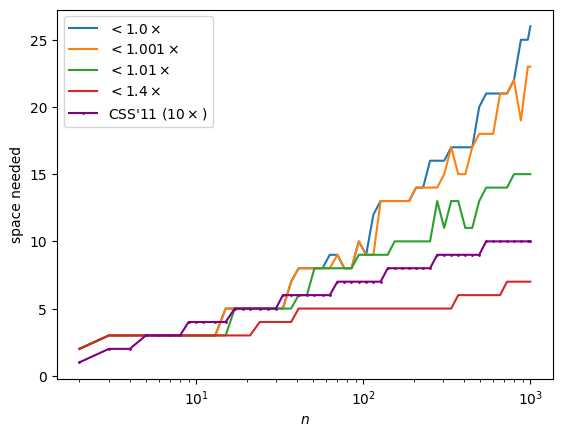

In [3]:
plt.figure()
for factor_off in df.columns:
    plt.plot(df.index, df[factor_off], label=f'$<{factor_off}\\times$')
plt.plot(df.index, np.ceil(np.log2(df.index)), label=r"CSS'11 $(10\times)$", ls='-', marker='.', color='purple', ms=2)
plt.xlabel('$n$')
plt.ylabel('space needed')
plt.legend()
plt.xscale('log')
plt.show()

In [4]:
Ns = (100, 1000)
max_space = 100
space_vec = []
approx_vec = []
dfs = {}

ds = np.arange(2, 100, 1)

for N in Ns:
    B = binning.bennett_matrix(N)
    baseline_mse = binning.get_mse(B, B)
    print(f"N={N}")

    df = pd.DataFrame(index=ds, columns=['space', 'approx'])
    for d in ds:

        c = 1 - 1 / d
        L, R, space = binning.approx_bennett_mm(N, c=c, perform_extra_checks=True)
        our_mse = binning.get_mse(L, R)

        df.at[d, 'approx'] = our_mse / baseline_mse
        df.at[d, 'space'] = space

        if space > max_space:
            break
    dfs[N] = df

N=100
N=1000


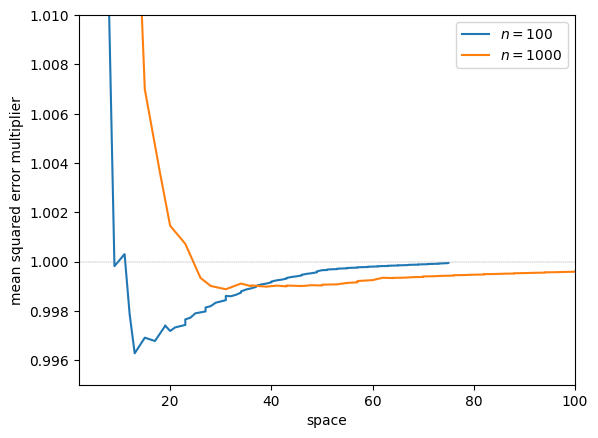

In [5]:
plt.figure()
for N, df in dfs.items():
    plt.plot(df['space'], df['approx'], label=f'$n={N}$')
plt.xlabel('space')
plt.ylabel('mean squared error multiplier')
plt.ylim([0.995, 1.01])
plt.xlim([2, 100])
plt.axhline(1.0, ls='--', lw=0.3, color='gray')
plt.legend()
plt.show()

# For maximum squared error

In [6]:
max_n = 1000
factor_off_list = [1.0, 1.001, 1.01, 1.4]

base = 1.1
n = 2
n_vec = [n]
while True:
    n *= base
    n = math.ceil(n)
    if n >= max_n:
        break
    n_vec.append(n)
n_vec.append(max_n)

df = pd.DataFrame(columns=factor_off_list, index=n_vec)

for factor_off in factor_off_list:
    print(f"factor_off={factor_off}")
    for n in n_vec:
        d = 2

        B = binning.bennett_matrix(n)
        target_error = factor_off * binning.get_max_se(B, B)
        our_error = 1000 * target_error
        space = None
        while our_error > target_error :

            c = 1 - 1 / d

            L, R, space = binning.approx_bennett_mm(n, c=c, perform_extra_checks=True)
            our_error = binning.get_max_se(L, R)
            if our_error > target_error:
                d += 1

        df.at[n, factor_off] = space

factor_off=1.0
factor_off=1.001
factor_off=1.01
factor_off=1.4


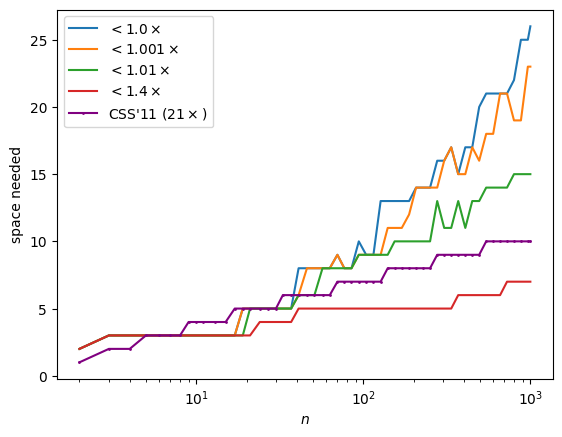

In [7]:
plt.figure()
for factor_off in df.columns:
    plt.plot(df.index, df[factor_off], label=f'$<{factor_off}\\times$')
plt.plot(df.index, np.ceil(np.log2(df.index)), label=r"CSS'11 $(21\times)$", ls='-', marker='.', color='purple', ms=2)
plt.xlabel('$n$')
plt.ylabel('space needed')
plt.legend()
plt.xscale('log')
plt.show()

In [8]:
Ns = (100, 1000)
max_space = 100
space_vec = []
approx_vec = []
dfs = {}

ds = np.arange(2, 100, 1)

for N in Ns:
    B = binning.bennett_matrix(N)
    baseline_error = binning.get_max_se(B, B)
    print(f"N={N}")

    df = pd.DataFrame(index=ds, columns=['space', 'approx'])
    for d in ds:

        c = 1 - 1 / d
        L, R, space = binning.approx_bennett_mm(N, c=c, perform_extra_checks=True)
        our_error = binning.get_max_se(L, R)

        df.at[d, 'approx'] = our_error / baseline_error
        df.at[d, 'space'] = space

        if space > max_space:
            break

    dfs[N] = df

N=100
N=1000


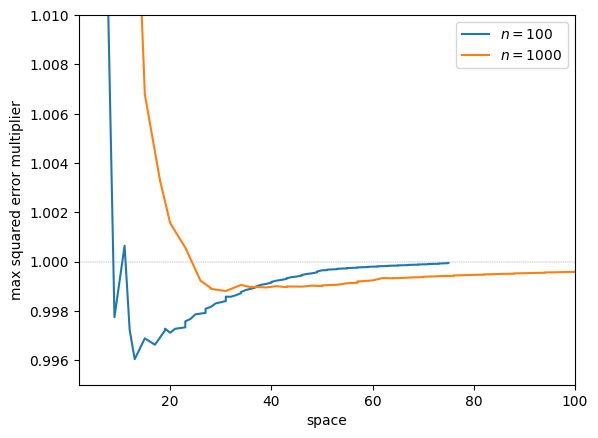

In [9]:
plt.figure()
for N, df in dfs.items():
    plt.plot(df['space'], df['approx'], label=f'$n={N}$')
plt.xlabel('space')
plt.ylabel('max squared error multiplier')
plt.ylim([0.995, 1.01])
plt.xlim([2, 100])
plt.axhline(1.0, ls='--', lw=0.3, color='gray')
plt.legend()
plt.show()

# Show an example factorization we get

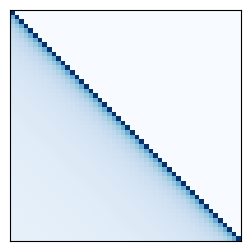

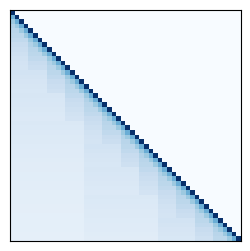

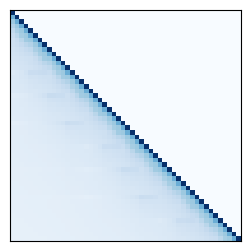

Our approximation: 0.99964534660313 in space 8
[[1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


In [10]:
n = 50
c = 0.75
L, R, our_space = binning.approx_bennett_mm(n, c=c)
B = binning.bennett_matrix(n)

plot_L, plot_R, plot_B = np.zeros((n,n)), np.zeros((n,n)), np.zeros((n,n))

figsize=(3, 3)
plt.figure(figsize=figsize)
plt.imshow(B, cmap='Blues', interpolation='nearest')
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)
plt.show()

plt.figure(figsize=figsize)
plt.imshow(L, cmap='Blues', interpolation='nearest')
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)
plt.show()

plt.figure(figsize=figsize)
plt.imshow(R, cmap='Blues', interpolation='nearest')
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)
plt.show()

print(f"Our approximation: {binning.get_mse(L, R) / binning.get_mse(B, B)} in space {our_space}")

print(L @ R)
print(B @ B)

# With weight decay and momentum

## Mean squared error

In [11]:
Ns = (100, 1000)
max_space = 200
alpha, beta = 1, 0.95
# alpha, beta = 1, 0.9
# alpha, beta = 0.99, 0
# alpha, beta = 0.999, 0
space_vec = []
approx_vec = []
dfs = {}


ds = np.hstack([np.linspace(1.1, 2, 10), np.arange(3, 100, 1)])
for N in Ns:
    B = binning.get_square_root_matrix(n=N, alpha=alpha, beta=beta)
    baseline_error = binning.get_mse(B, B)
    print(f"N={N}")

    df = pd.DataFrame(index=ds, columns=['space', 'approx'])
    for d in ds:

        c = 1 - 1 / d
        L, R, space = binning.approx_counting_with_decay_momentum(n=N, alpha=alpha, beta=beta, c=c, perform_extra_checks=True)
        our_error = binning.get_mse(L, R)

        df.at[d, 'approx'] = our_error / baseline_error
        df.at[d, 'space'] = space

        if space > max_space:
            break

    dfs[N] = df

# Just to make points appear in proper order
for N in Ns:
    dfs[N] = dfs[N].sort_values(['space'],ascending=[True])

N=100
N=1000


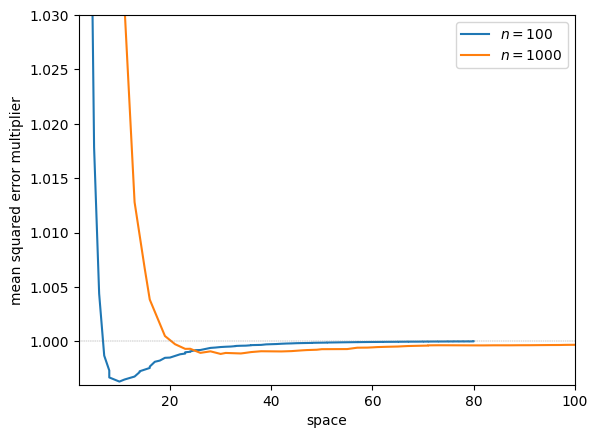

In [12]:
plt.figure()
for N, df in dfs.items():
    plt.plot(df['space'], df['approx'], label=fr'$n={N}$')
plt.xlabel('space')
plt.ylabel('mean squared error multiplier')
plt.xlim([2, 100])
plt.ylim([0.996, 1.03])
plt.axhline(1.0, ls='--', lw=0.3, color='gray')
plt.legend()
plt.show()

## Maximum squared error

In [13]:
Ns = (100, 1000)
max_space = 200
alpha, beta = 1, 0.95
# alpha, beta = 1, 0.9
# alpha, beta = 0.99, 0
# alpha, beta = 0.999, 0
space_vec = []
approx_vec = []
dfs = {}


ds = np.hstack([np.linspace(1.1, 2, 10), np.arange(3, 100, 1)])
for N in Ns:
    B = binning.get_square_root_matrix(n=N, alpha=alpha, beta=beta)
    baseline_error = binning.get_max_se(B, B)
    print(f"N={N}")

    df = pd.DataFrame(index=ds, columns=['space', 'approx'])
    for d in ds:

        c = 1 - 1 / d
        L, R, space = binning.approx_counting_with_decay_momentum(n=N, alpha=alpha, beta=beta, c=c, perform_extra_checks=True)
        our_error = binning.get_max_se(L, R)

        df.at[d, 'approx'] = our_error / baseline_error
        df.at[d, 'space'] = space

        if space > max_space:
            break

    dfs[N] = df

# Just to make points appear in proper order
for N in Ns:
    dfs[N] = dfs[N].sort_values(['space'],ascending=[True])

N=100
N=1000


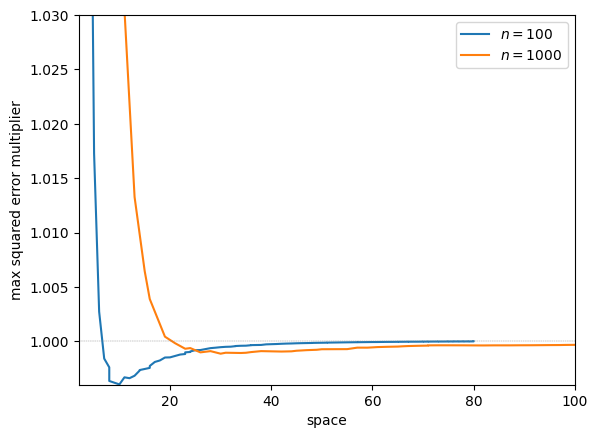

In [14]:
plt.figure()
for N, df in dfs.items():
    plt.plot(df['space'], df['approx'], label=fr'$n={N}$')
plt.xlabel('space')
plt.ylabel('max squared error multiplier')
plt.xlim([2, 100])
plt.ylim([0.996, 1.03])
plt.axhline(1.0, ls='--', lw=0.3, color='gray')
plt.legend()
plt.show()

# Show example factorization

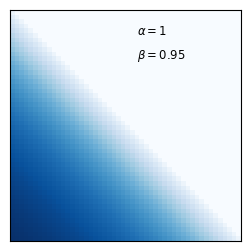

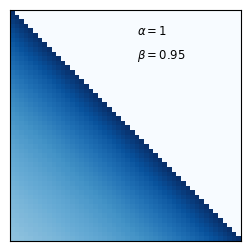

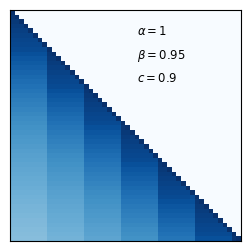

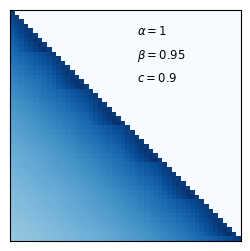

Our approximation: 0.9944773807344167 in space 8
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  3.55271368e-15 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.44089210e-16
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.11022302e-15  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.44089210e-16  1.11022302e-15  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]


In [15]:
n = 50
alpha, beta, c = 1, 0.95, 0.9

L, R, our_space = binning.approx_counting_with_decay_momentum(n=n, alpha=alpha, beta=beta, c=c)
B = binning.get_square_root_matrix(n=n, alpha=alpha, beta=beta)
A = binning.counting_matrix_with_decay_and_momentum(n=n, alpha=alpha, beta=beta)

plot_L, plot_R, plot_B, plot_A = np.zeros((n,n)), np.zeros((n,n)), np.zeros((n,n)), np.zeros((n,n))


figsize=(3,3)
plt.figure(figsize=figsize)
plt.imshow(A, cmap='Blues', interpolation='nearest')
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)
plt.text(27, 5, rf'$\alpha={alpha}$', size='small')
plt.text(27, 10, rf'$\beta={beta}$', size='small')
plt.show()

plt.figure(figsize=figsize)
plt.imshow(B, cmap='Blues', interpolation='nearest')
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)
plt.text(27, 5, rf'$\alpha={alpha}$', size='small')
plt.text(27, 10, rf'$\beta={beta}$', size='small')
plt.show()

plt.figure(figsize=figsize)
plt.imshow(L, cmap='Blues', interpolation='nearest')
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)
plt.text(27, 5, rf'$\alpha={alpha}$', size='small')
plt.text(27, 10, rf'$\beta={beta}$', size='small')
plt.text(27, 15, rf'$c={c}$', size='small')
plt.show()

plt.figure(figsize=figsize)
plt.imshow(R, cmap='Blues', interpolation='nearest')
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)
plt.text(27, 5, rf'$\alpha={alpha}$', size='small')
plt.text(27, 10, rf'$\beta={beta}$', size='small')
plt.text(27, 15, rf'$c={c}$', size='small')
plt.show()

print(f"Our approximation: {binning.get_mse(L, R) / binning.get_mse(B, B)} in space {our_space}")

print(L @ R - A)
print(B @ B - A)
print(A)